In [1]:
import chess
import chess.svg
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
import pandas as pd
from our_graph2_encode import move_to_index, encode_node_features, create_batch_from_boards, encode_edge_features, encode_global_node_features, static_edge_index, static_edge_map, base_graph_edges, index_to_move
from scipy.special import softmax
from helloworld_model2 import start_model, model_predict

def get_model_move(board):
    pred_moves, pred_eval = model_predict(model, board)
    return index_to_move[np.argmax(pred_moves)]

def get_move_from_dataset(game_number, move_number):
    return chess.Move.from_uci(df["Moves_UCI"][game_number].split(" ")[move_number])

def rgba_to_hex(r, g, b, a=255):
    r = int(round(np.clip(r, 0, 1) * 255))
    g = int(round(np.clip(g, 0, 1) * 255))
    b = int(round(np.clip(b, 0, 1) * 255))
    a = int(round(np.clip(a, 0, 1) * 255))
    return f'#{r:02X}{g:02X}{b:02X}{a:02X}'

df = pd.read_csv("kingbase_processed_all.csv")
model = start_model()

created 64 nodes
created 1792 edge
current state (FEN): r1bqkbnr/pppp1ppp/2n5/1B2p3/4P3/5N2/PPPP1PPP/RNBQK2R b KQkq - 3 3

encode result:
node matrix shape: (64, 12)
edge matrix shape: (1792, 11)
--- Static Graph Components ---
static_edge_index shape: torch.Size([2, 1792])
static_edge_map shape: torch.Size([1792])
------------------------------
Using device: cpu


d:\programming\github\Advance_Machine_Learning_Project\helloworld_model2.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_lo

# Demo 1

get board from FEN

is checkmate: False
is stalemate: False


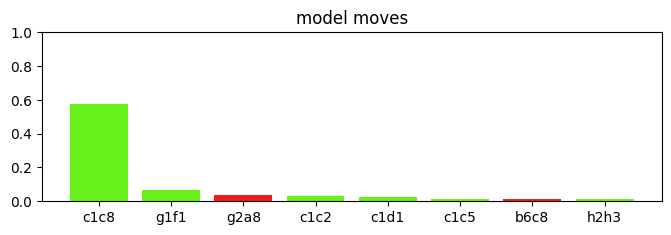

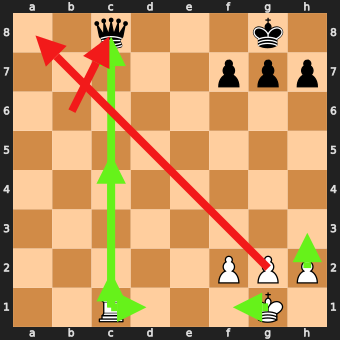

In [2]:
FEN = "2q3k1/5ppp/8/8/8/8/5PPP/2R3K1 w - - 0 1"

board = chess.Board(fen=FEN)

n = 8

print(f"is checkmate: {board.is_checkmate()}")
print(f"is stalemate: {board.is_stalemate()}")

model_move_vec, eval = model_predict(model, board)
index_array = np.flip(np.argsort(model_move_vec[0]))[:n]
top_moves = [index_to_move[a] for a in index_array]
softmax_array = softmax(model_move_vec[0])
alphas = softmax_array[index_array]

colors = []
arrows = []
for i in range(n):
    if top_moves[i] in board.legal_moves:
        color = rgba_to_hex(0.4, 0.95, 0.1, 2.25 * alphas[i])
        arrows.append(chess.svg.Arrow(top_moves[i].from_square, top_moves[i].to_square, color=color))
        colors.append((0.4, 0.95, 0.1))
    else:
        color = rgba_to_hex(0.95, 0.1, 0.1, 2.25 * alphas[i])
        arrows.append(chess.svg.Arrow(top_moves[i].from_square, top_moves[i].to_square, color=color))    
        colors.append((0.95, 0.1, 0.1)) 

plt.figure(figsize=(8,2.2))
plt.title("model moves")
plt.ylim((0, 1))
plt.bar([move.uci() for move in top_moves], alphas, color=colors)
plt.show()

svg = chess.svg.board(
    board,
    arrows=arrows,
    size=340,
) 
svg

# Demo 2

In [3]:
# run this to start random game from dataset

ran = np.random.randint(len(df))
counter = 0
print(f"game number: {ran}")
board = chess.Board()

game number: 287194


is checkmate: False
is stalemate: False


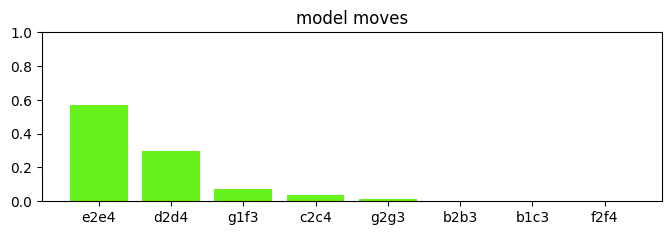

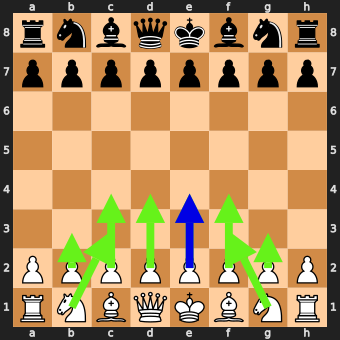

In [4]:
# run this to replay the moves of the game
# green is legal move, red is illegal move, blue is move played by the player

n = 8

print(f"is checkmate: {board.is_checkmate()}")
print(f"is stalemate: {board.is_stalemate()}")
if (not (board.is_checkmate() or board.is_stalemate() or counter == 0)):
    board.push(dataset_move)

dataset_move = get_move_from_dataset(ran, counter)
model_move_vec, eval = model_predict(model, board)
index_array = np.flip(np.argsort(model_move_vec[0]))[:n]
top_moves = [index_to_move[a] for a in index_array]
softmax_array = softmax(model_move_vec[0])
alphas = softmax_array[index_array]

colors = []
arrows = []
for i in range(n):
    if top_moves[i] in board.legal_moves:
        color = rgba_to_hex(0.4, 0.95, 0.1, 2.25 * alphas[i])
        arrows.append(chess.svg.Arrow(top_moves[i].from_square, top_moves[i].to_square, color=color))
        colors.append((0.4, 0.95, 0.1))
    else:
        color = rgba_to_hex(0.95, 0.1, 0.1, 2.25 * alphas[i])
        arrows.append(chess.svg.Arrow(top_moves[i].from_square, top_moves[i].to_square, color=color))    
        colors.append((0.95, 0.1, 0.1))   
arrows.append(chess.svg.Arrow(dataset_move.from_square, dataset_move.to_square, color="#0000e470"))

plt.figure(figsize=(8,2.2))
plt.title("model moves")
plt.ylim((0, 1))
plt.bar([move.uci() for move in top_moves], alphas, color=colors)
plt.show()

svg = chess.svg.board(
    board,
    arrows=arrows,
    size=340,
) 
counter += 1
svg